# Анализ программы лояльности магазина

## Постановка задачи<a class="anchor" id="first-bullet"></a>

Перед нами данные о покупках в магазине. Ежемесячная стоимость участия в программе лояльности для покупателя составляет 200 рублей. Наша задача: проанализировать программу лояльности магазина.

Цель нашего исследования:
- понять результат внедрения программы лояльности;
- оценить, достаточно ли она доходна для магазина;
- выяснить, приносят ли участники программы лояльности больше денег;
- проанализировать, увеличивает ли программа лояльности выручку количественно или в денежном эквиваленте или не влияет на выручку вовсе.
- проверить гипотезу о том, отличается ли выручка от участников программы лояльности и остальных покупателей.

## Декомпозиция<a class="anchor" id="third-bullet"></a>

### Шаг 1. Загрузка данных

 - Загрузить данные  
 - Вывести первые 5 строк
 - Посмотреть размер датасета
 - Посмотреть типы данных
 - Переименовать столбцы при необходимости

### Шаг 2. Предобработка данных и исследовательский анализ

- Заменить типы данных при необходимости
- Проверить данные на наличие пропущенных значений
- Выдвинуть гипотезы о причинах пропусков в данных
- Обработать пропуски там, где это возможно
- Сделать проверку на дубликаты
- Удалить дубликаты
- Подумать, какое распределение признака мы ожидаем увидеть в каждом случае
- Построить распределения признаков
- Построить распределения во времени
- Проанализировать признаки на наличие выбросов и редких значений
- Удалить редкие выбивающиеся значения
- Сделать вывод и перечислить все найденные неясности и неожиданности в данных

### Шаг 3. Анализ программы лояльности

- Выбрать и посчитать метрику для средней цены одной единицы товара
- Объединить датафреймы
- Добавить в датафрейм поле с итоговой стоимостью покупки `revenue` 
- Добавить в датафрейм столбцы с месяцем и днём покупки
- Найти даты первых визитов лояльных покупателей в каждом месяце, чтобы отследить взнос участников программы лояльности и на основе этой информации добавить столбец с общей выручкой `total_revenue`
- Показать соотношение количества покупателей по группам лояльности
- Проанализировать выручку:
  - посчитать общую выручку по группам лояльности за всё время наблюдений;
  - построить график выручки в день для групп лояльных и нелояльных покупателей;
  - построить столбчатую диаграмму с суммарной выручкой в месяц для групп лояльных и нелояльных покупателей;
  - построить столбчатую диаграмму со средней выручкой в месяц на покупателя для групп лояльных и нелояльных покупателей;
  - построить столбчатую диаграмму с суммарной выручкой по магазинам для групп лояльных и нелояльных покупателей.
- Провести анализ среднего чека:
  - построить гистограмму распределения суммы чека для групп лояльных и нелояльных покупателей;
  - построить гистограмму распределения среднего чека в расчете на покупателя для групп лояльных и нелояльных покупателей;
  - построить гистограмму распределения среднего чека по магазинам для групп лояльности.
- Происследовать количество покупок:
  - построить график общего количества покупок по дням;
  - построить график количества покупок по дням для групп лояльности;
  - построить гистограмму распределения количества покупок;
  - найти среднее число покупок на одного покупателя.

### Шаг 4. Проверка гипотез

- Гипотеза 1.  
  Нулевая гипотеза H<sub>0</sub>: выручки групп лояльных и нелояльных покупателей одинаковы.  
  Альтернативная гипотеза H<sub>1</sub>: выручки групп лояльных и нелояльных покупателей отличаются.  
- Гипотеза 2.
  Нулевая гипотеза H<sub>0</sub>: средний чек в группах лояльных и нелояльных пользователей одинаков.  
  Альтернативная гипотеза H<sub>1</sub>: средний чек в группах лояльных и нелояльных пользователей отличается.  
- Гипотеза 3.
  Нулевая гипотеза H<sub>0</sub>: число покупок на одного клиента в группах лояльных и нелояльных пользователей одинаково.
  Альтернативная гипотеза H<sub>1</sub>: число покупок на одного клиента в группах лояльных и нелояльных пользователей отличается. 

### Шаг 5. Вывод  и рекомендации

## Выполнение работы

## Шаг 1. Загрузка данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
sns.set_style("whitegrid")

In [3]:
def first_look_on_data(data, n):
    """
    Выводит основную информацию по датасету:
    первые n строк;
    размер;
    информацию о типах столбцов;
    имена столбцов;
    число пропусков в столбцах;
    число дубликатов;
    уникальные значения столбцов для типа object;
    таблицу describe для типов данных int и float.
    """
    print ('\033[1m' + f'Первые {n} строк:' + '\033[0m')
    display(data.head(n))
    print('-------------------------------------------------------------------------')
    print ('\033[1m' + 'Info' + '\033[0m')
    data.info()
    print('-------------------------------------------------------------------------')
    print(f'В датасете {data.shape[0]} строк и {data.shape[1]} столбца') if data.shape[1] <=4 \
    else print(f'В датасете {data.shape[0]} строк и {data.shape[1]} столбцов') 
    print('-------------------------------------------------------------------------')
    print ('\033[1m' + 'Названия столбцов' + '\033[0m')
    print(data.columns)
    print('-------------------------------------------------------------------------')  
    print ('\033[1m' + 'Число пропусков:' + '\033[0m')
    display(data\
            .isna()\
            .sum()\
            .to_frame()\
            .assign(perc = lambda row: row[0]/data.shape[0])\
            .rename(columns={0:"Кол-во пропусков", "perc":"Процент пропусков"})\
            .style.set_table_styles(
        [{'selector': 'tr:hover',
          'props': [('background-color', '#0B62B9')]}]
    ))
    print('-------------------------------------------------------------------------')
    print ('\033[1m' + 'Число дубликатов:' + '\033[0m')
    print(data.duplicated().sum())
    print('-------------------------------------------------------------------------')
    print ('\033[1m' + 'Уникальные значения столбцов' + '\033[0m')
    print()

    for col in data.columns:
        if 'id' in col.lower():
            pass
        elif 'object' in data[col].dtype.name:
            print ('\033[1m' + 'Число уникальных значений:' + '\033[0m')
            print(data[col].nunique())
            print('-------------------------')
            print(data[col].value_counts())
            print()
        else:
            print(data[col].describe())
            print()

In [4]:
product_codes_df = pd.read_csv('../datasets/product_codes.csv')

In [5]:
first_look_on_data(product_codes_df, 10)

Первые 10 строк:


,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39
5,22752,7.65
6,21730,4.25
7,22633,1.85
8,22632,1.85
9,84879,1.69


-------------------------------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB
-------------------------------------------------------------------------
В датасете 9969 строк и 2 столбца
-------------------------------------------------------------------------
Названия столбцов
Index(['productID', 'price_per_one'], dtype='object')
-------------------------------------------------------------------------
Число пропусков:


,Кол-во пропусков,Процент пропусков
productID,0,0.000000
price_per_one,0,0.000000


-------------------------------------------------------------------------
Число дубликатов:
0
-------------------------------------------------------------------------
Уникальные значения столбцов

count     9969.000000
mean        19.503697
std        330.880754
min          0.000000
25%          1.250000
50%          2.550000
75%          5.510000
max      16888.020000
Name: price_per_one, dtype: float64



Итак, в нашем датасете 9969 строк наблюдений и 2 признака - идентификатор товара и цена за единицу. Пропусков и дубликатов нет. 

Сразу возникает вопрос - откуда берутся цены равные 0 рублей?

Очень большой разброс цен. Медиана равна 2.55 рубля, 75% цен меньше 5.51 рублей, а среднее уехало аж до  19.50 рублей.

Так как во втором датасете есть поле `item_id`, которое обозначает то же самое, что и `productID` в этом датасете, заменим сразу здесь для единообразия название этого столбца.

In [6]:
product_codes_df = product_codes_df.rename(columns={'productID': 'item_id'})

In [7]:
retail_df = pd.read_csv('../datasets/retail_dataset.csv', parse_dates=['purchasedate'])

In [8]:
first_look_on_data(retail_df, 10)

Первые 10 строк:


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0
5,538379,22965,0,2016-12-12 11:26:00,22805.0,Shop 0,1.0
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0.0
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0.0
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0.0
9,539501,22372,0,2016-12-20 11:08:00,22764.0,Shop 0,1.0


-------------------------------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_ID          105335 non-null  object        
 2   Quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   CustomerID       69125 non-null   float64       
 5   ShopID           105335 non-null  object        
 6   loyalty_program  105335 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.6+ MB
-------------------------------------------------------------------------
В датасете 105335 строк и 7 столбцов
-------------------------------------------------------------------------
Названия столбцов
Index(['purchaseid', 'item_ID', 'Quantity

,Кол-во пропусков,Процент пропусков
purchaseid,0,0.000000
item_ID,0,0.000000
Quantity,0,0.000000
purchasedate,0,0.000000
CustomerID,36210,0.343760
ShopID,0,0.000000
loyalty_program,0,0.000000


-------------------------------------------------------------------------
Число дубликатов:
1033
-------------------------------------------------------------------------
Уникальные значения столбцов

count    105335.000000
mean          7.821218
std         327.946695
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: Quantity, dtype: float64

count                  105335
unique                   4430
top       2016-12-06 16:57:00
freq                      675
first     2016-12-01 08:26:00
last      2017-02-28 17:04:00
Name: purchasedate, dtype: object

count    105335.000000
mean          0.226345
std           0.418467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: loyalty_program, dtype: float64



Заменим имена столбцов.

In [9]:
retail_df = retail_df.rename(columns={'purchaseid': 'purchase_id',
                                      'item_ID': 'item_id',
                                      'Quantity': 'quantity',
                                      'purchasedate': 'purchase_date',
                                      'CustomerID': 'customer_id',
                                      'ShopID': 'shop_id'})

У нас есть данные о заказах за 3 месяца с 6 декабря 2016 по 28 февраля 2017 года. Нашлось целых 1033 дубликата. Сразу видны ошибки в данных - в столбце `quantity` минимальное значение - отрицательное. Также есть пропуски в столбце `customer_id` - целых 34%. Необходимо понять, как влияет данный столбец на наш анализ, действительно ли необходимо удалить этих пользователей?

Судя по всему всего 22% покупателей участвуют в программе лояльности.

## Шаг 2. Предобработка данных и исследовательский анализ

### Разберемся с типами данных.

In [10]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   float64       
 5   shop_id          105335 non-null  object        
 6   loyalty_program  105335 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.6+ MB


Поле `loyalty_program` почему-то имеет тип `float`, заменим его на `int`.

In [11]:
retail_df['loyalty_program'] = retail_df['loyalty_program'].astype('int')

Тип данных столбца `purchase_date` мы исправили при загрузке на `datetime64`. Тип данных столбца `quantity` верный.

In [12]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   float64       
 5   shop_id          105335 non-null  object        
 6   loyalty_program  105335 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


Поля `purchase_id`, `item_id`, `shop_id` могут быть типа `int`, если содержат только цифры.

In [13]:
retail_df['purchase_id'].value_counts().sort_index()

536365      7
536366      2
536367     12
536368      4
536369      1
           ..
C545003     2
C545033     6
C545040     1
C545068     1
C545189     1
Name: purchase_id, Length: 4894, dtype: int64

In [14]:
retail_df['item_id'].value_counts().sort_index()

10002           58
10080            1
10120            5
10123C           1
10124A           2
                ..
gift_0001_20     3
gift_0001_30     3
gift_0001_40     1
gift_0001_50     1
m                1
Name: item_id, Length: 3159, dtype: int64

В столбце `item_id` пропусков нет, но также есть идентификаторы вида `gift_0001_20`, содержащие не только числа, но и буквы.

Раз мы обнаружили в идентификаторах буквы и все они теперь типа `object`, приведем их к нижнему регистру.

In [15]:
for col in ['purchase_id', 'item_id', 'shop_id']:
    retail_df[col] = retail_df[col].str.lower()

In [16]:
product_codes_df['item_id'] = product_codes_df['item_id'].str.lower()

### Обработка пропусков

Так как мы будем считать количество покупок на одного пользователя, мы не сможем корректно посчитать эту метрику без идентификаторов пользователей.

In [17]:
retail_df[retail_df['customer_id'].isna()]['loyalty_program'].value_counts()

0    36210
Name: loyalty_program, dtype: int64

Также мы видим, что среди покупателей с пропущенными идентификаторами нет участников программы лояльности.  
Удалим данные с пропусками.

In [18]:
retail_df = retail_df.dropna()

In [19]:
retail_df['customer_id'].isna().sum()

0

### Удалим дубликаты

In [20]:
retail_df = retail_df.drop_duplicates()

In [21]:
retail_df.shape

(68154, 7)

## EDA

### Распределение признака `quantity`

In [22]:
100*(retail_df['quantity'] < 0).sum()/retail_df.shape[0]

2.6234703759133726

Более, чем в 2% данных количество товара указано некорректно. Возможно, это возврат. Нужно проверить, есть ли точно такие же записи о покупках с положительным значением количества и датой раньше. Проверим хотя бы одну такую запись.

In [23]:
retail_df[retail_df['quantity'] < 0].head(10)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
64,c539944,22776,-2,2016-12-23 11:38:00,20239.0,shop 0,0
109,c542910,20726,-2,2017-02-01 15:38:00,23190.0,shop 0,1
112,c542426,22418,-25,2017-01-28 09:32:00,19825.0,shop 0,0
253,c539726,22791,-11,2016-12-21 14:24:00,22686.0,shop 0,1
344,c544034,21878,-2,2017-02-15 11:28:00,20380.0,shop 0,0
458,c539667,21285,-25,2016-12-21 10:47:00,18827.0,shop 0,0
636,c543764,79191d,-13,2017-02-11 15:16:00,22714.0,shop 0,1
660,c537602,22423,-3,2016-12-07 12:45:00,23190.0,shop 0,1
742,c539260,21258,-8,2016-12-16 14:32:00,20779.0,shop 0,0
748,c540417,85099b,-101,2017-01-07 10:56:00,19359.0,shop 0,0


Возьмем первую строку и поищем такое же только положительное количество товара с таким же значением `customer_id`.

In [24]:
retail_df[(retail_df['item_id'] == '22776')  & (retail_df['customer_id'] == 20239)]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
64,c539944,22776,-2,2016-12-23 11:38:00,20239.0,shop 0,0
50953,539326,22776,11,2016-12-17 09:22:00,20239.0,shop 0,0
89023,542351,22776,11,2017-01-27 12:13:00,20239.0,shop 0,0


In [25]:
retail_df[(retail_df['item_id'] == '22418')  & (retail_df['customer_id'] == 19825)]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
112,c542426,22418,-25,2017-01-28 09:32:00,19825.0,shop 0,0
50899,539444,22418,23,2016-12-17 15:52:00,19825.0,shop 0,0


In [26]:
retail_df[(retail_df['item_id'] == '21285')  & (retail_df['customer_id'] == 18827)]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
458,c539667,21285,-25,2016-12-21 10:47:00,18827.0,shop 0,0


В первом случае можно сказать, что наша гипотеза подтвердилась и действительно 17 декабря была совершена покупка 11 единиц товара, а 23 декабря был возврат 2 единиц товара.  
Во втором примере на мой взгляд промежуток между покупкой и возвратом длинноват, и покупка была только на 23 единицы, а вернули 25.   
В последнем случае у нас вообще нет данных о покупке. Может быть, она была совершена до начала сбора данных (до 6 декабря). А, может быть, просто не был указан идентификатор покупателя, ведь он не принимает участия в программе лояльности.    
Будем предполагать, что данные отрицательные значения - это возврат товара. Оставим их как есть. При подсчете общего дохода сумма возврата вычтется.  

In [27]:
retail_df['quantity'].describe()

count    68154.000000
mean        11.119890
std        406.602498
min     -74216.000000
25%          1.000000
50%          4.000000
75%         11.000000
max      74214.000000
Name: quantity, dtype: float64

Максимальное и минимальное значения похожи на выбросы. Посмотрим распределение.

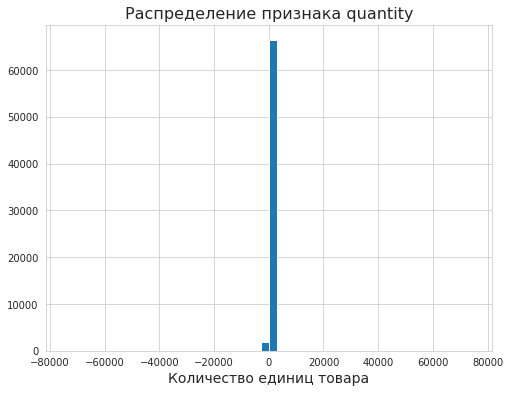

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
retail_df['quantity'].hist(bins=50)
plt.title('Распределение признака quantity', fontsize=16)
plt.xlabel('Количество единиц товара', fontsize=14);

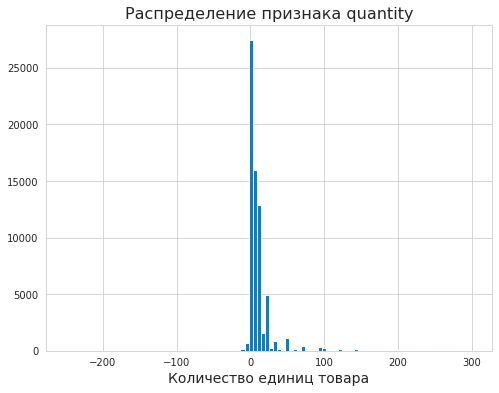

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
retail_df['quantity'].hist(bins=100, range=(-250,300))
plt.title('Распределение признака quantity', fontsize=16)
plt.xlabel('Количество единиц товара', fontsize=14);


Основная масса товара ограничивается 200 единицами.

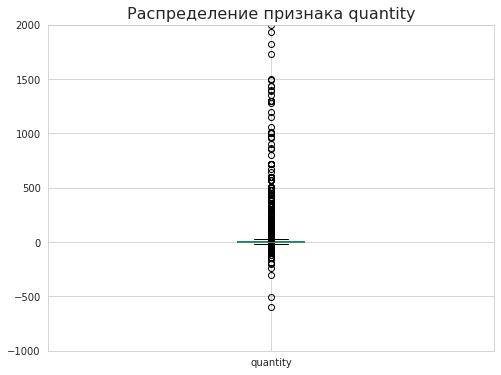

In [30]:
retail_df['quantity'].plot.box(ylim=(-1000, 2000), figsize=(8,6))
plt.title('Распределение признака quantity', fontsize=16);

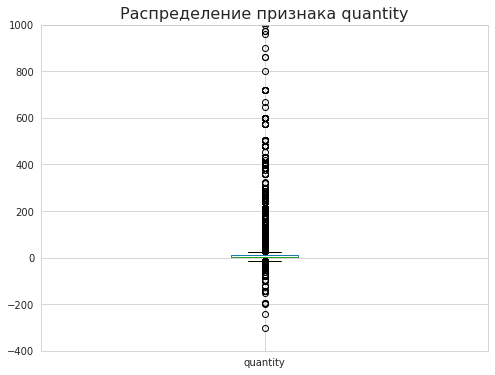

In [31]:
retail_df['quantity'].plot.box(ylim=(-400, 1000), figsize=(8,6))
plt.title('Распределение признака quantity', fontsize=16);

По диаграмме размаха можно сказать, что количество единиц больше 400 и меньше -100 - редкие значения.  
Но стоит ли их удалять? Ведь при подсчете выручки это может исказить результаты. 

На гистограмме виден пик в 0. Странное большое количество некупленного товара. 

In [33]:
100*(retail_df['quantity'] == 0).sum()/retail_df.shape[0]

18.31440561082255

In [34]:
retail_df[retail_df['quantity'] == 0]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
1,538862,22195,0,2016-12-14 14:11:00,22389.0,shop 0,1
3,543543,22271,0,2017-02-09 15:33:00,23522.0,shop 0,1
4,543812,79321,0,2017-02-13 14:40:00,23151.0,shop 0,1
5,538379,22965,0,2016-12-12 11:26:00,22805.0,shop 0,1
9,539501,22372,0,2016-12-20 11:08:00,22764.0,shop 0,1
...,...,...,...,...,...,...,...
105305,543309,22919,0,2017-02-07 12:05:00,23797.0,shop 0,1
105307,539766,22572,0,2016-12-22 11:11:00,19771.0,shop 0,0
105314,538073,22439,0,2016-12-09 14:10:00,23495.0,shop 0,1
105315,543306,22898,0,2017-02-07 11:56:00,22365.0,shop 0,1


Видим, что нет какой-либо закономерности. Есть покупатели и с id  и без. Есть участники программы лояльности и воздержавшиеся. Сами товары (item_id) разные.

Покупки с количеством, равным 0, придется удалить, так как это и не покупки, и не подарок, а на подсчет среднего это будет влиять.

### Распределение признака `quantity` во времени

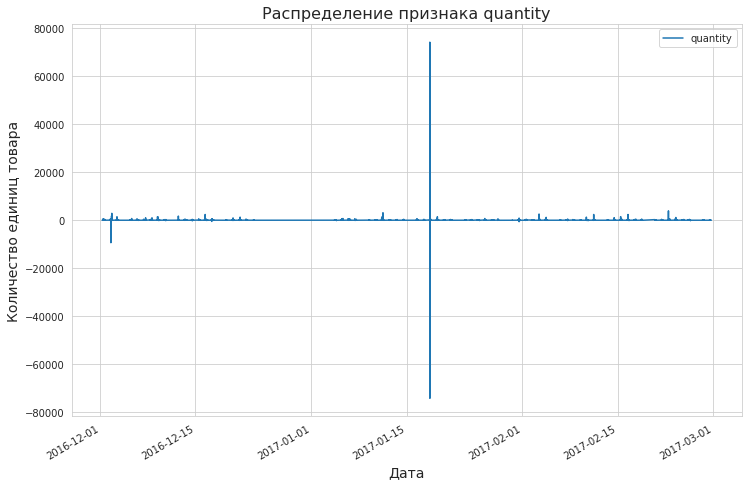

In [35]:
retail_df.plot(x='purchase_date', y='quantity', figsize=(12,8))
plt.title('Распределение признака quantity', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество единиц товара', fontsize=14);

In [36]:
retail_df[retail_df['quantity'] < -74000]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
49411,c541433,23166,-74216,2017-01-18 10:17:00,18025.0,shop 0,0


In [37]:
retail_df[retail_df['quantity'] > 74000]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
69074,541431,23166,74214,2017-01-18 10:01:00,18025.0,shop 0,0


Да, в пределах двадцати минут один человек купил товар, а вот возвратил на две единицы больше. На выручку это не повлияет. На количество покупок повлияет, придется еще учитывать количество возвратов.

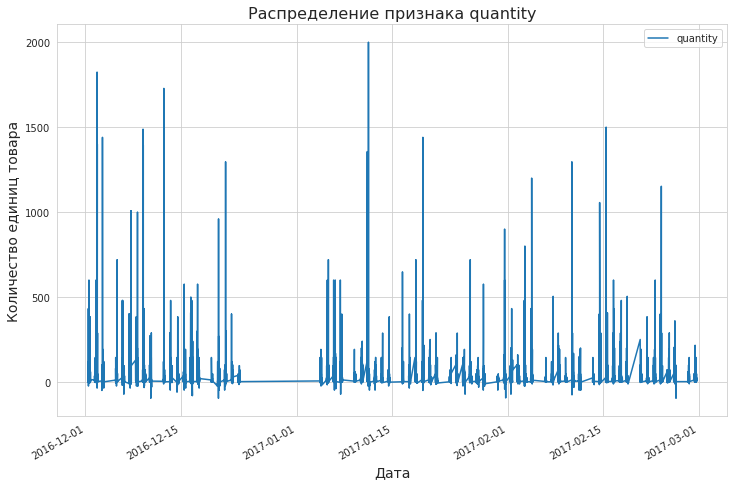

In [38]:
retail_df[(retail_df['quantity'] > -100) & (retail_df['quantity'] < 2200)]\
.plot(x='purchase_date', y='quantity', figsize=(12,8))
plt.title('Распределение признака quantity', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество единиц товара', fontsize=14);

В целом, количество покупок больше, чем возвратов. Но можно заметить, что возвращают товар достаточно часто. 

### Распределение признака `purchase_date`

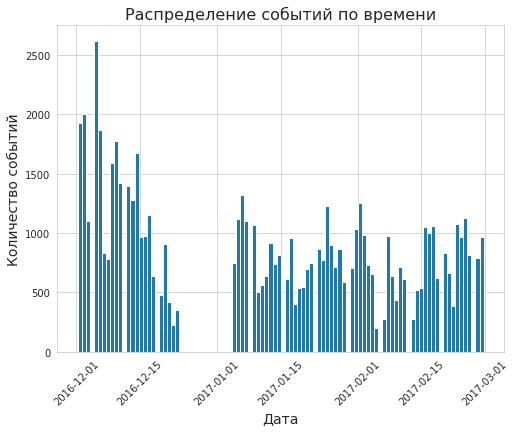

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
plt.xticks(rotation=45)
plt.hist(retail_df['purchase_date'], bins=100);
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество событий', fontsize=14)
plt.grid(True)
plt.title('Распределение событий по времени', fontsize=16);

Виден пробел в данных с конца декабря по начало января.

In [40]:
retail_df[(retail_df['purchase_date'] > pd.to_datetime('2016-12-24')) &
         (retail_df['purchase_date'] < pd.to_datetime('2017-01-04'))]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program


У нас нет данных с 24 декабря 2016 года по 4 января 2017. А, значит, мы не сможем проверить гипотезу о том, что люди больше покупают в праздники в полной мере. Остается только 23 февраля. Но уже сейчас можно видеть тренд на убывание покупок после нового года. Может быть, это связано с тем, что цены изменились в новом году или с тем, что перед праздниками люди тратят больше, чем после праздников.

### Распределение признака `shop_id`

In [41]:
len(retail_df['shop_id'].value_counts())

29

In [42]:
retail_df['shop_id'].value_counts()

shop 0     60418
shop 4      1739
shop 1      1540
shop 6       903
shop 8       560
shop 3       492
shop 7       312
shop 10      299
shop 12      278
shop 18      255
shop 2       252
shop 5       179
shop 11      169
shop 14      154
shop 19       74
shop 9        61
shop 15       60
shop 16       59
shop 26       56
shop 27       45
shop 22       40
shop 17       40
shop 13       35
shop 24       32
shop 20       30
shop 28       30
shop 21       18
shop 30       15
shop 29        9
Name: shop_id, dtype: int64

Всего у нас 29 магазинов. Это уже категориальная переменная. Можем построить столбчатую диаграмму для нее.

In [43]:
shop_id_data = retail_df['shop_id']\
.value_counts()\
.reset_index()\
.rename(columns={'shop_id': 'objects_count', 'index': 'shop_id'})

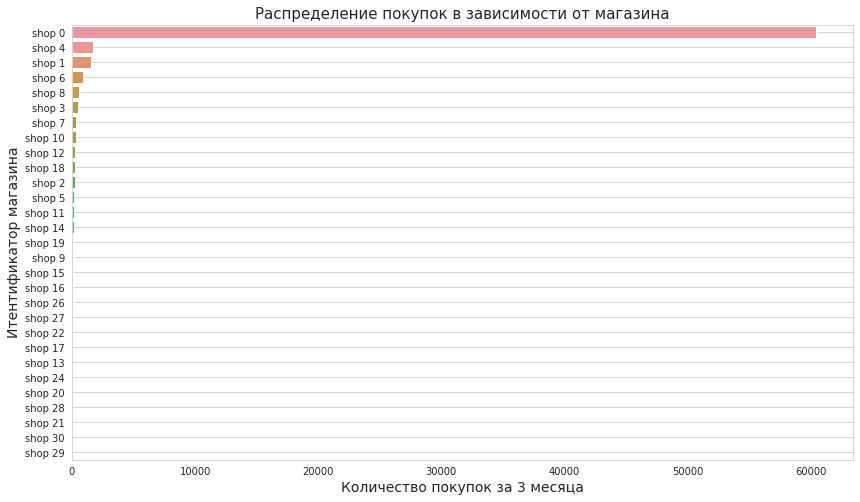

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax = sns.barplot(x="objects_count", y="shop_id", data=shop_id_data);
ax.set_title('Распределение покупок в зависимости от магазина', fontsize = 15)
ax.set_ylabel("Итентификатор магазина", fontsize = 14)
ax.set_xlabel("Количество покупок за 3 месяца", fontsize = 14);
plt.grid();

In [45]:
retail_df['shop_id']\
.value_counts()\
.reset_index()\
.rename(columns={'shop_id': 'objects_count', 'index': 'shop_id'})\
.query('objects_count > 150')\
.sort_values(by='objects_count')\
.set_index('shop_id')

,objects_count
shop_id,
shop 14,154
shop 11,169
shop 5,179
shop 2,252
shop 18,255
shop 12,278
shop 10,299
shop 7,312
shop 3,492


В 15 магазинах из 29 количество покупок меньше 100. 

### Распределение признака `loyalty_program`

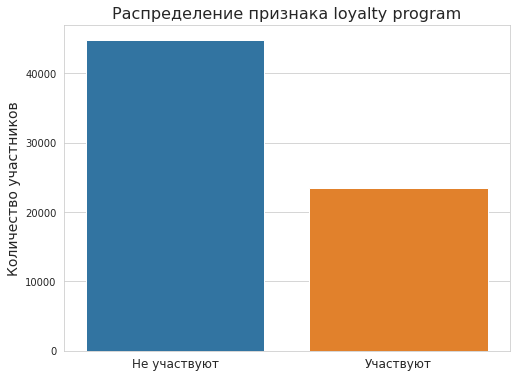

In [46]:
loyalty_program_stat = retail_df['loyalty_program']\
.value_counts()\
.reset_index()\
.rename(columns={'index': 'loyalty_program', 'loyalty_program': 'participants_count'})

fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(x="loyalty_program", y="participants_count", data=loyalty_program_stat)
plt.title('Распределение признака loyalty program', fontsize=16)
ax.set_xticklabels(["Не участвуют","Участвуют"], fontsize=12)
plt.xlabel('')
plt.ylabel('Количество участников', fontsize=14);


Большая часть клиентов не участвует в программе лояльности.

### Распределение признака `price_per_one` в датафрейме `product_codes`.

In [47]:
product_codes_df['price_per_one'].describe()

count     9969.000000
mean        19.503697
std        330.880754
min          0.000000
25%          1.250000
50%          2.550000
75%          5.510000
max      16888.020000
Name: price_per_one, dtype: float64

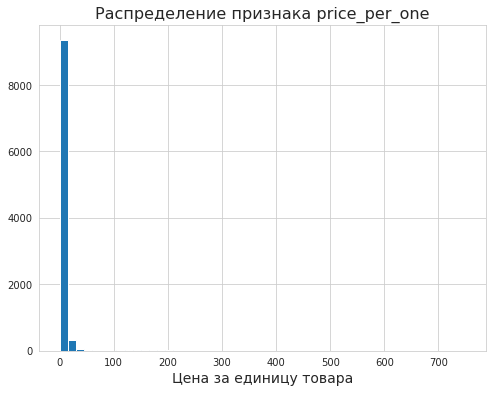

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 

product_codes_df['price_per_one'].hist(range=(0,750), bins=50)
plt.xlabel('Цена за единицу товара', fontsize=14)
plt.grid(True)
plt.title('Распределение признака price_per_one', fontsize=16);

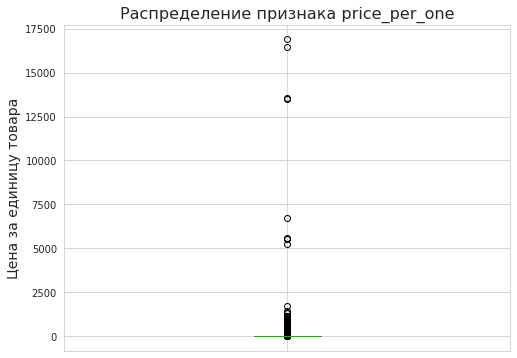

In [49]:
ax = product_codes_df['price_per_one'].plot.box(figsize=(8, 6))
plt.ylabel('Цена за единицу товара', fontsize=14)
plt.grid(True)
ax.set_xticklabels('')
plt.title('Распределение признака price_per_one', fontsize=16);

Явно видим, что цена дороже 5000 рублей точно редкие. Смотрим глубже.

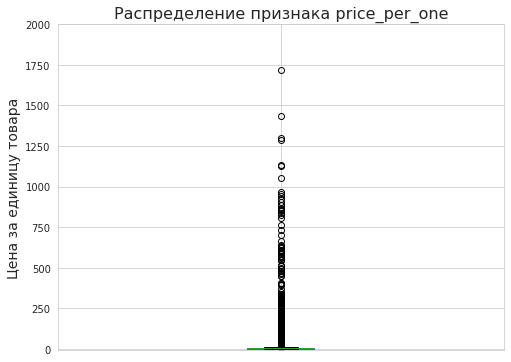

In [50]:
ax = product_codes_df['price_per_one'].plot.box(ylim=(-10, 2000), figsize=(8, 6))
plt.ylabel('Цена за единицу товара', fontsize=14)
plt.grid(True)
ax.set_xticklabels('')
plt.title('Распределение признака price_per_one', fontsize=16);

В принципе, даже цены дороже 500 рублей уже аномальные. Но мы оставим в датасете их все, чтобы не убавлять реальную выручку.

Сразу возникает вопрос - откуда берутся цены равные 0 рублей? Хотя, может быть, это подарок за покупку по акции. 

Очень большой разброс цен. Медиана равна 2.55 рубля, 75% цен меньше 5.51 рублей, а среднее уехало аж до 19.50 рублей.


In [51]:
(product_codes_df['price_per_one'] == 0).sum()

382

In [52]:
(product_codes_df['price_per_one'] > 1000).sum()

15

Нулевых цен по количеству гораздо больше, чем аномально больших. Медиана будет сдвигаться в сторону нуля. Поэтому мы уберем из выборки нулевые цены.

Посмотрим на записи с такими ценами. Может быть, там есть какая-то логика.

In [53]:
zero_prices = product_codes_df[product_codes_df['price_per_one'] == 0]['item_id'].to_list()

In [54]:
retail_df[retail_df['item_id'].isin(zero_prices)]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
4,543812,79321,0,2017-02-13 14:40:00,23151.0,shop 0,1
9,539501,22372,0,2016-12-20 11:08:00,22764.0,shop 0,1
31,543040,22550,1,2017-02-02 17:06:00,23016.0,shop 0,1
37,544824,22682,9,2017-02-24 09:32:00,22818.0,shop 0,1
41,537607,85099b,3,2016-12-07 13:18:00,21644.0,shop 0,0
...,...,...,...,...,...,...,...
105269,537464,21481,5,2016-12-07 10:14:00,20586.0,shop 0,0
105272,538518,84406b,2,2016-12-12 16:14:00,20184.0,shop 0,0
105302,537023,22678,0,2016-12-03 16:02:00,22404.0,shop 0,1
105306,538992,22112,4,2016-12-15 11:56:00,21629.0,shop 0,0


Также никакой логики за этим нет. Цены, равные нулю, убираем.

### Очищаем от редких выбивающихся значений

In [55]:
product_codes_filtered = product_codes_df[product_codes_df['price_per_one'] != 0].copy()

In [56]:
retail_filtered = retail_df[retail_df['quantity'] != 0].copy()

In [57]:
100*retail_filtered.shape[0]/retail_df.shape[0]

81.68559438917745

У нас осталось 81% от данных в таблице retail, очищенной от пропусков в идентификаторах пользователей.

In [58]:
100*product_codes_filtered.shape[0]/product_codes_df.shape[0]

96.1681211756445

В таблице product_codes почти все данные уцелели.

## Шаг 3. Анализ программы лояльности

In [59]:
product_codes_df[product_codes_df['item_id'] == '10002']

,item_id,price_per_one
31,10002,0.85
2459,10002,1.66
8122,10002,1.63


Итак, в таблице `product_codes_df` неожиданным образом мы видим, что у нас есть целых три цены для одного и того же товара. Причем цены сильно разнятся. Видимо, это разные предложения и акции магазина. Странно, что они никак не разграничены по столбцам. Придется найти среднюю цену. Так как разброс значений велик, используем медиану.

### Найдем среднюю цену за единицу товара

In [60]:
product_codes_grouped = product_codes_filtered\
.groupby('item_id')['price_per_one'].agg(['median']).sort_values(by='median', ascending=False)\
.rename(columns={'median': 'avg_price_per_one'})

In [61]:
product_codes_grouped.head()

,avg_price_per_one
item_id,
amazonfee,6706.71
22655,265.50
dot,198.19
22826,175.00
22827,155.00


### Объединим датафреймы

In [62]:
merged_df = retail_filtered.join(product_codes_grouped, on='item_id', how='inner')

In [63]:
merged_df.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,avg_price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,shop 0,0,1.63
15316,541566,21873,35,2017-01-19 11:50:00,23401.0,shop 0,1,1.63
18594,538843,21873,1,2016-12-14 13:18:00,21712.0,shop 0,0,1.63
19469,540838,21873,11,2017-01-11 15:13:00,19541.0,shop 0,0,1.63
20828,543592,21873,5,2017-02-10 11:57:00,22922.0,shop 0,1,1.63


### Добавим поле с итоговой ценой покупки

In [64]:
merged_df['total_cost'] = merged_df['quantity'] * merged_df['avg_price_per_one']

### Добававим столбец Месяц покупки

In [65]:
merged_df['month'] = merged_df['purchase_date'].astype('datetime64[M]')

In [66]:
merged_df['date'] = merged_df['purchase_date'].dt.date

### Создадим датафрейм с датами первых визитов покупателей в каждом месяце

In [67]:
first_visits = merged_df.reset_index().groupby(['month', 'loyalty_program', 'customer_id'])\
.agg(first_visit=('purchase_date', 'min'),
    index=('index', 'min'))\
.eval('fee=loyalty_program*200')
first_visits.head()

first_visit  index  fee
month      loyalty_program customer_id                                
2016-12-01 0               18026.0     2016-12-07 14:57:00   6914    0
                           18027.0     2016-12-16 19:09:00   3363    0
                           18049.0     2016-12-14 12:58:00   1016    0
                           18056.0     2016-12-20 09:37:00   2585    0
                           18062.0     2016-12-22 14:28:00   1214    0

In [68]:
def calculate_membership_fee(row):
    """
    Принимает строку объединенного датафрейма,
    ищет в датафрейме с первыми визитами покупателей совпадение,
    возвращает сумму вступительного взноса при найденном совпадении дат,
    возвращает 0, если это не первый визит покупателя.
    """
    location = first_visits\
    .loc[str(row['month'].date()), row['loyalty_program'], row['customer_id']]
    
    if location['index'] == row.name:
        return first_visits.loc[str(row['month'].date()), row['loyalty_program'], row['customer_id']]['fee']
    
    return 0 

Ничего более быстродейственного не удалось изобрести((

In [69]:
merged_df['fee'] = merged_df.apply(calculate_membership_fee, axis=1)

In [70]:
merged_df['fee'].sum()

169800

### Дополнительный расчет сборов за участие в программе лояльности

Просто для проверки сверимся, правильно ли посчитана сумма взноса.

In [71]:
loyalty_revenue = merged_df[merged_df['loyalty_program'] == 1].groupby('month')['customer_id']\
.nunique()\
.reset_index()\
.rename(columns={'customer_id': 'customers_count'})\
.eval('month_fee = customers_count * 200')\
['month_fee'].sum()
loyalty_revenue

169800

### Подсчитаем общую выручку за всё время

In [72]:
merged_df['total_revenue'] = merged_df['total_cost'] + merged_df['fee']

In [73]:
round(merged_df['total_revenue'].sum())

2294794.0

### Сколько человек участвует в программе лояльности

In [74]:
loyalty_data = merged_df['loyalty_program'].value_counts().reset_index()
loyalty_data

,index,loyalty_program
0,0,37846
1,1,17826


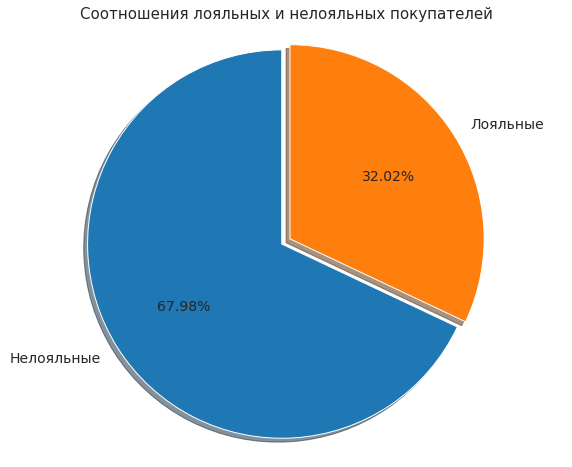

In [75]:
explode = (0, 0.05)
ax = loyalty_data['loyalty_program'].plot.pie(labels = ['Нелояльные', 'Лояльные'], shadow=True, explode=explode,
                                              startangle=90, figsize=(10, 8), fontsize=14, autopct='%.2f%%');
ax.set_title("Соотношения лояльных и нелояльных покупателей", fontsize = 15)
ax.set_ylabel("")
ax.axis('equal')  

plt.show()


Посмотрим, есть ли тенденция к росту количества лояльных покупателей.

In [76]:
customers_count = merged_df.groupby(['month', 'loyalty_program'])[['total_revenue']].count().reset_index()

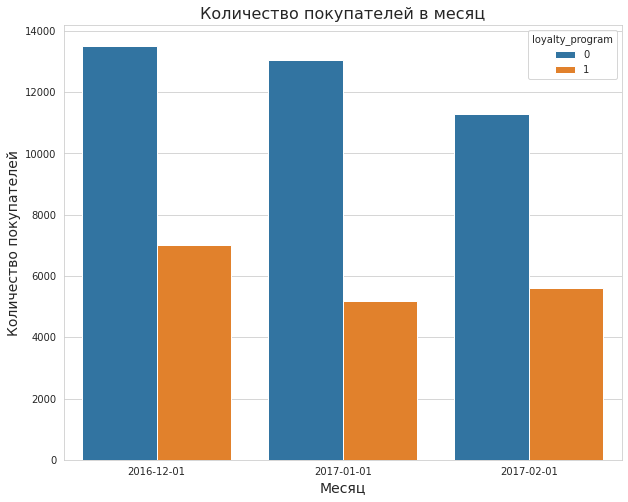

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.barplot(x="month", y="total_revenue", hue="loyalty_program", data=customers_count)
plt.title('Количество покупателей в месяц', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество покупателей', fontsize=14);
x_dates = customers_count['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, ha='center');

В декабре в обеих группах было максимальное количество покупателей. Январь - месяц праздников, каникул, да и части данных у нас нет за этот период, поэтому здесь число покупателей ниже. Однако, в феврале количество нелояльных покупателей снова снижается в то время как лояльных хоть и немного, но прибавилось.  
Но нельзя сказать, что заметна тенденция к росту числа лояльных покупателей.

## Анализ выручки

### Выручка за все время по группам

Группы участник/не участник программы лояльности

In [78]:
grouped_revenue = merged_df.groupby('loyalty_program')['total_revenue'].sum().reset_index()
grouped_revenue['loyalty_program'] = grouped_revenue['loyalty_program'].map({0: 'Нелояльные',1: 'Лояльные'})
grouped_revenue

,loyalty_program,total_revenue
0,Нелояльные,1517225.570
1,Лояльные,777568.035


### График распределение выручки во времени по группам лояльности

Построим скользящее окно для выручки групп лояльных и нелояльных покупателей.

In [79]:
merged_df = merged_df.sort_values(by='purchase_date')

In [80]:
loyalty_revenue_df = merged_df[merged_df['loyalty_program'] == 1][['purchase_date', 'total_revenue']]
not_loyalty_revenue_df = merged_df[merged_df['loyalty_program'] == 0][['purchase_date', 'total_revenue']]

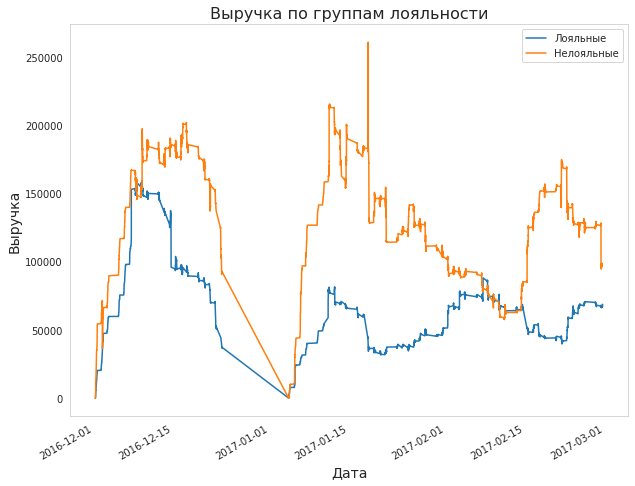

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8)) 
loyalty_revenue_df.set_index('purchase_date')['total_revenue'].rolling(window='7D')\
.sum().plot(label='Лояльные')
not_loyalty_revenue_df.set_index('purchase_date')['total_revenue'].rolling(window='7D')\
.sum().plot(label='Нелояльные')
plt.title('Выручка по группам лояльности', fontsize=16)

plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.grid()
plt.legend();

Может, я что-то неправильно делаю, но график скользящего окна получатеся не сильно нагляднее, чем выручка по дням. Лучше, наверно, вообще не включать его в презентацию.

И построим график выручки, сгруппированной по неделям.

In [82]:
merged_df['week'] = (pd.to_datetime(merged_df['purchase_date'], unit='d') \
                    - pd.to_timedelta(merged_df['purchase_date'].dt.dayofweek, unit='d')).dt.date

In [83]:
week_revenue = merged_df.groupby(['week', 'loyalty_program'])['total_revenue'].sum().reset_index()
week_revenue.head()

,week,loyalty_program,total_revenue
0,2016-11-28,0,89664.090
1,2016-11-28,1,59890.690
2,2016-12-05,0,184104.910
3,2016-12-05,1,149922.545
4,2016-12-12,0,185550.740


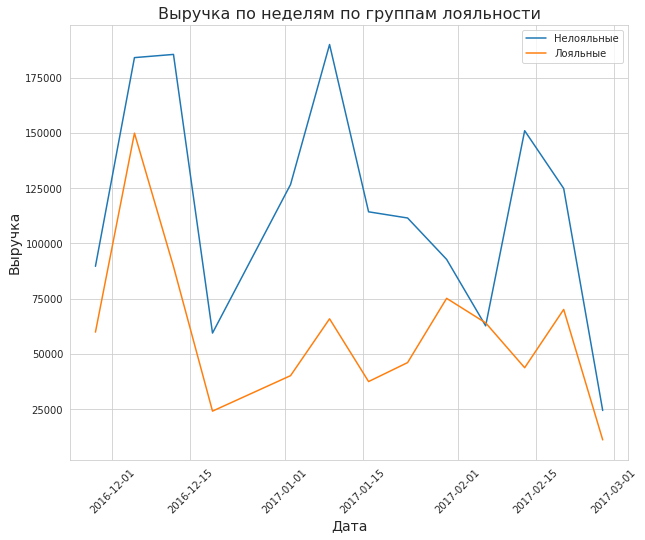

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8)) 

plt.plot(week_revenue[week_revenue['loyalty_program'] == 0]['week'], 
         week_revenue[week_revenue['loyalty_program'] == 0]['total_revenue'], label='Нелояльные');
plt.plot(week_revenue[week_revenue['loyalty_program'] == 1]['week'], 
         week_revenue[week_revenue['loyalty_program'] == 1]['total_revenue'], label='Лояльные');
plt.title('Выручка по неделям по группам лояльности', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.grid(True)
plt.legend();

Так как у нас нет данных за конец декабря - начало января, в этом месте на графиках получилась яма. У лояльных покупателей после нового года выручка примерно на одном уровне, на графике для нелояльных покупателей видны несколько ярко выраженных пиков - продажи происходят неравномерно.

### Столбчатая диаграмма средней выручки по месяцам по группам лояльности

In [85]:
avg_revenue = merged_df.groupby(['month', 'loyalty_program'])['total_revenue']\
.agg(['mean', 'median']).reset_index()
avg_revenue

,month,loyalty_program,mean,median
0,2016-12-01,0,38.385287,20.055
1,2016-12-01,1,46.105922,15.050
2,2017-01-01,0,43.330516,18.400
3,2017-01-01,1,39.512222,14.130
4,2017-02-01,0,38.378297,18.150
5,2017-02-01,1,44.307662,15.575


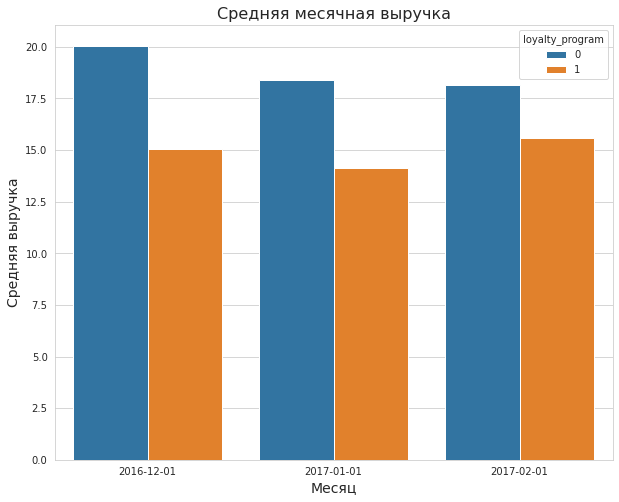

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.barplot(x="month", y="median", hue="loyalty_program", data=avg_revenue)
plt.title('Средняя месячная выручка', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Средняя выручка', fontsize=14);
x_dates = avg_revenue['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, ha='center');

Средняя выручка в группе нелояльных покупателей снижается постепенно тогда, как выручка в группе лояльных покупателей за последний месяц начала расти.

### Столбчатая диаграмма общей выручки по месяцам по группам лояльности

In [87]:
total_month_revenue = merged_df.groupby(['month', 'loyalty_program'])['total_revenue'].agg('sum').reset_index()
total_month_revenue

,month,loyalty_program,total_revenue
0,2016-12-01,0,518777.155
1,2016-12-01,1,323525.255
2,2017-01-01,0,565809.875
3,2017-01-01,1,204989.410
4,2017-02-01,0,432638.540
5,2017-02-01,1,249053.370


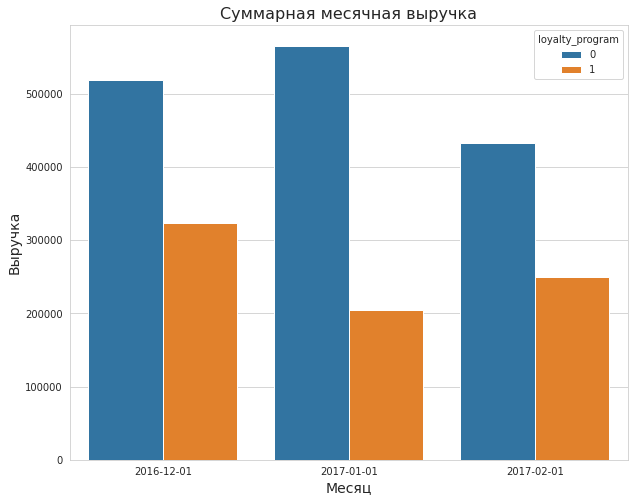

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.barplot(x="month", y="total_revenue", hue="loyalty_program", data=total_month_revenue)
plt.title('Суммарная месячная выручка', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Выручка', fontsize=14);
x_dates = avg_revenue['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, ha='center');

### Средняя выручка с клиента по группам лояльности

Посмотрим на среднюю выручку на одного клиента за всё время наблюдений.

In [89]:
merged_df.groupby(['loyalty_program', 'customer_id'])['total_revenue'].agg(['sum']).reset_index()\
.groupby('loyalty_program')['sum'].agg(['mean', 'median'])

,mean,median
loyalty_program,,
0,1312.478867,479.5375
1,1331.452115,690.2500


Медианные значения получились сильно меньше средних из-за большого разброса цен.

Средняя выручка на одного клиента по месяцам.

In [90]:
median_month_revenue = merged_df.groupby(['month', 'loyalty_program', 'customer_id'])\
.agg(total_revenue=('total_revenue', 'sum')).reset_index()\
.groupby(['month', 'loyalty_program'])\
.agg(mean_total_revenue=('total_revenue', 'mean'),
    median_total_revenue=('total_revenue', 'median'))
median_month_revenue

mean_total_revenue  median_total_revenue
month      loyalty_program                                          
2016-12-01 0                        861.756071              417.7000
           1                        943.222318              544.9050
2017-01-01 0                       1045.859288              443.2800
           1                        861.300042              577.5475
2017-02-01 0                        825.646069              407.2125
           1                        929.303619              598.9500

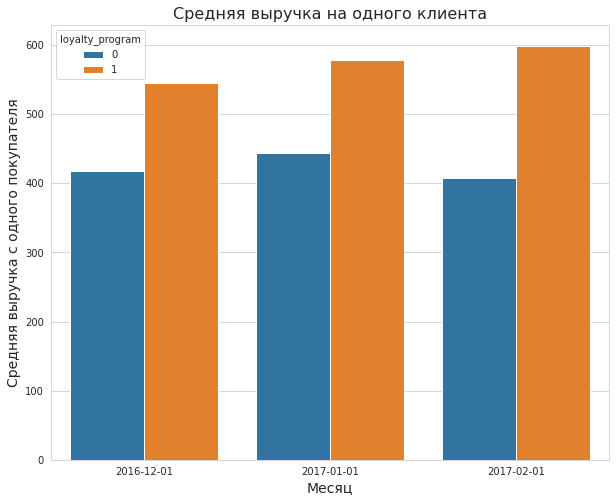

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.barplot(x="month", y="median_total_revenue", hue="loyalty_program", 
                 data=median_month_revenue.reset_index())
plt.title('Средняя выручка на одного клиента', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Средняя выручка с одного покупателя', fontsize=14);
x_dates = avg_revenue['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, ha='center');

А вот здесь выясняется, что в среднем лояльные покупатели покупают на большие суммы, чем нелояльные.

## Анализ чека

### Распределение суммы чека по группам лояльности

In [92]:
total_revenue_df = merged_df\
.groupby(['loyalty_program', 'purchase_id'])['total_revenue'].sum().reset_index()

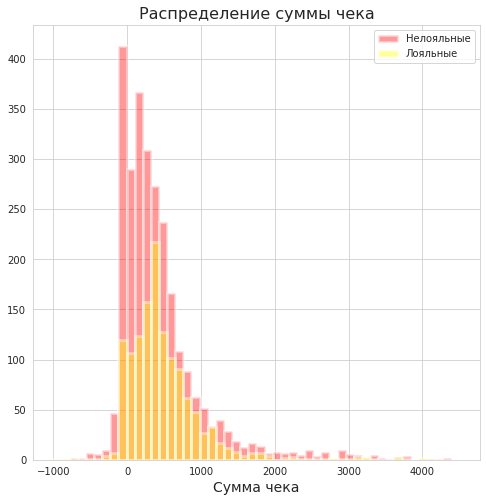

In [93]:
type_colors = {0: 'red',
              1: 'yellow'}

fig, ax = plt.subplots(figsize=(8,8))
grouped_df = total_revenue_df.groupby('loyalty_program')
label = ''
for name, group in grouped_df:
    if name == 0:
        label = 'Нелояльные'
    else:
        label = 'Лояльные'
    sns.distplot(group['total_revenue'].dropna(), kde=False,  color=type_colors[name], label=label,
                hist_kws={"range": (-1000, 4500), "linewidth": 3}, ax =ax)

plt.title('Распределение суммы чека', fontsize=16)
plt.legend();
plt.xlabel('Сумма чека', fontsize=14)
plt.grid(True)

Видно, что пик сумм чека лояльных покупателей находится дальше, чем нелояльных, а значит, среднее значение будет больше.

### Средний чек каждого покупателя

In [94]:
mean_check = merged_df.groupby(['loyalty_program', 'customer_id', 'purchase_id'])\
.agg(total_check = ('total_revenue', 'sum'))\
.reset_index()\
.groupby(['loyalty_program', 'customer_id'])\
['total_check'].agg(['median', 'mean']).reset_index()

In [95]:
mean_check[mean_check['loyalty_program'] == 0]['median'].median()

292.3125

In [96]:
mean_check[mean_check['loyalty_program'] == 1]['median'].median()

411.5

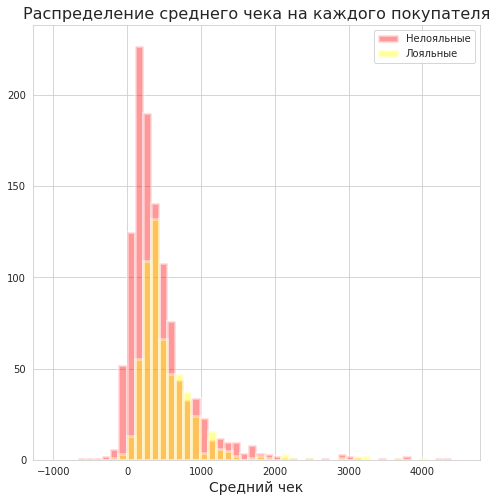

In [97]:
fig, ax = plt.subplots(figsize=(8,8))

sns.distplot(mean_check[mean_check['loyalty_program'] == 0]['median'].dropna(), kde=False,  color=type_colors[0], 
             label='Нелояльные', hist_kws={"range": (-1000, 4500), "linewidth": 3}, ax =ax)
sns.distplot(mean_check[mean_check['loyalty_program'] == 1]['median'].dropna(), kde=False,  color=type_colors[1],
             label='Лояльные', hist_kws={"range": (-1000, 4500), "linewidth": 3}, ax =ax)
          
plt.title('Распределение среднего чека на каждого покупателя', fontsize=16)
plt.legend()
plt.xlabel('Средний чек', fontsize=14)
plt.grid(True);

### Средний чек

In [98]:
total_revenue_df.groupby('loyalty_program')['total_revenue'].agg(['mean', 'median'])

,mean,median
loyalty_program,,
0,549.918655,280.475
1,584.198373,392.640


В среднем сумма чека лояльных покупателей выше, чем у нелояльных.

## Количество покупок

In [99]:
purchases_count = merged_df[merged_df['total_revenue'] > 0]\
.groupby(['loyalty_program', 'customer_id'])\
.agg(purchases_count = ('purchase_id', 'nunique'))\
.reset_index()
purchases_count.head()

,loyalty_program,customer_id,purchases_count
0,0,18025.0,1
1,0,18026.0,2
2,0,18027.0,2
3,0,18029.0,1
4,0,18031.0,1


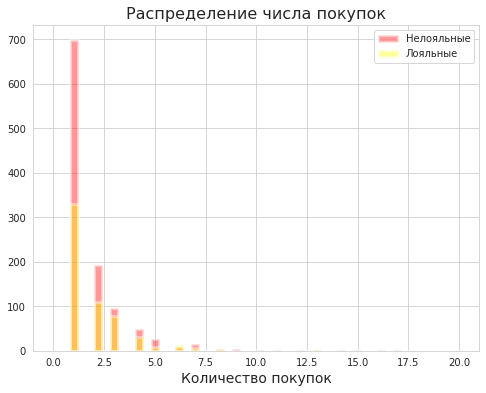

In [100]:
fig, ax = plt.subplots(figsize=(8,6))

sns.distplot(purchases_count[purchases_count['loyalty_program'] == 0]['purchases_count'], kde=False,  
             color=type_colors[0], label='Нелояльные',
                hist_kws={"range": (0, 20), "linewidth": 3}, ax=ax)

sns.distplot(purchases_count[purchases_count['loyalty_program'] == 1]['purchases_count'], kde=False,  
             color=type_colors[1], label='Лояльные',
                hist_kws={"range": (0, 20), "linewidth": 3}, ax=ax)
plt.legend();
plt.title('Распределение числа покупок', fontsize = 16)
plt.xlabel('Количество покупок', fontsize = 14)
plt.grid(True)

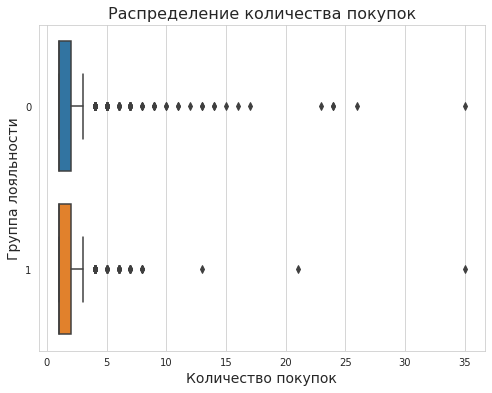

In [101]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))

sns.boxplot(y="loyalty_program", x="purchases_count", data=purchases_count, orient="h")
ax.set_ylabel("Группа лояльности", fontsize = 14)
ax.set_xlabel("Количество покупок", fontsize = 14)
ax.set_title("Распределение количества покупок", fontsize = 16);

Распределения числа покупок для лояльных и нелояльных покупателей похожи.

### Среднее число покупок на одного покупателя

In [102]:
purchases_count.groupby(['loyalty_program'])['purchases_count'].agg(['mean', 'median'])

,mean,median
loyalty_program,,
0,1.990090,1
1,2.013722,1


In [103]:
merged_df\
.groupby(['month', 'loyalty_program', 'customer_id', 'purchase_id'])\
['total_revenue'].sum().reset_index()\
.groupby(['month', 'loyalty_program', 'customer_id'])['purchase_id'].count().reset_index()\
.groupby(['month', 'loyalty_program'])['purchase_id'].agg(['mean', 'median'])

mean  median
month      loyalty_program                  
2016-12-01 0                1.802326       1
           1                1.758017       1
2017-01-01 0                1.622921       1
           1                1.424370       1
2017-02-01 0                1.519084       1
           1                1.451493       1

В среднем каждый покупатель обеих групп совершает всего лишь одну покупку и эта картина не меняется от месяца к месяцу.

## Количество возвратов

In [104]:
refunds_count = merged_df[merged_df['total_revenue'] < 0]\
.groupby(['loyalty_program', 'customer_id'])\
.agg(refunds_count = ('purchase_id', 'nunique'))\
.reset_index()
refunds_count.head()

,loyalty_program,customer_id,refunds_count
0,0,18025.0,1
1,0,18041.0,1
2,0,18044.0,1
3,0,18062.0,1
4,0,18074.0,2


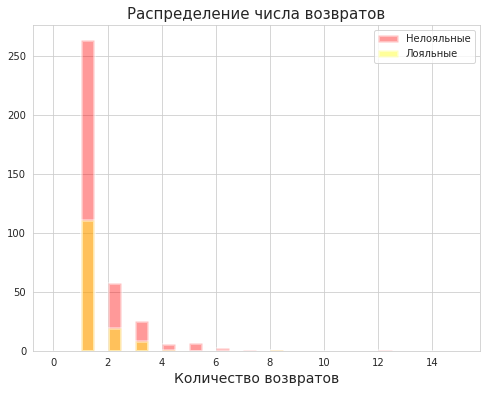

In [105]:
fig, ax = plt.subplots(figsize=(8,6))

sns.distplot(refunds_count[refunds_count['loyalty_program'] == 0]['refunds_count'], kde=False,  
             color=type_colors[0], label='Нелояльные',
                hist_kws={"range": (0, 15), "linewidth": 3}, ax=ax, bins=30)

sns.distplot(refunds_count[refunds_count['loyalty_program'] == 1]['refunds_count'], kde=False,  
             color=type_colors[1], label='Лояльные',
                hist_kws={"range": (0, 15), "linewidth": 3}, ax=ax, bins=30)
plt.legend();
plt.title('Распределение числа возвратов', fontsize = 15)
plt.xlabel('Количество возвратов', fontsize = 14)
plt.grid(True)

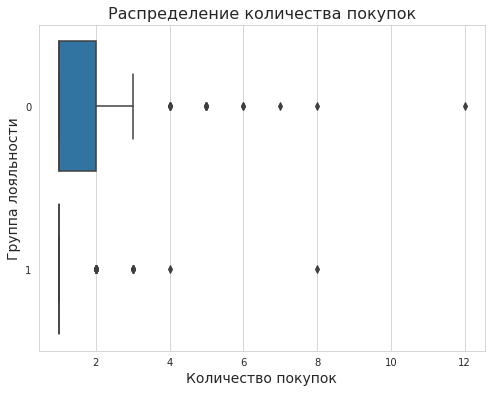

In [106]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))

sns.boxplot(y="loyalty_program", x="refunds_count", data=refunds_count, orient="h")
ax.set_ylabel("Группа лояльности", fontsize = 14)
ax.set_xlabel("Количество покупок", fontsize = 14)
ax.set_title("Распределение количества покупок", fontsize = 16);

Покупатели, не участвующие в программе лояльности, возвращают товар чаще.

In [107]:
100*round(refunds_count[refunds_count['loyalty_program'] == 0]['refunds_count'].sum() /\
purchases_count[purchases_count['loyalty_program'] == 0]['purchases_count'].sum(), 2)

25.0

In [108]:
100*round(refunds_count[refunds_count['loyalty_program'] == 1]['refunds_count'].sum()/\
purchases_count[purchases_count['loyalty_program'] == 1]['purchases_count'].sum(), 2)

16.0

Процент возвратов от лояльных покупателей значительно меньше.

### Рассмотрим группировку по магазинам

In [109]:
total_revenue_per_shop = merged_df.groupby(['shop_id', 'loyalty_program'])['total_revenue'].sum().reset_index()\
.sort_values(by='total_revenue', ascending=False)

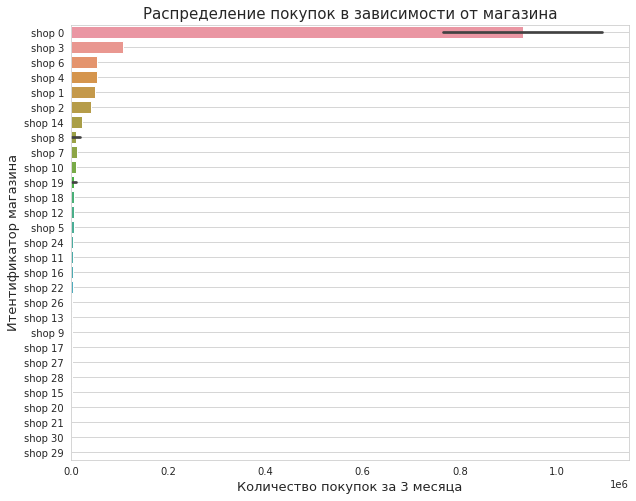

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.barplot(x="total_revenue", y="shop_id", data=total_revenue_per_shop);
ax.set_title('Распределение покупок в зависимости от магазина', fontsize = 15)
ax.set_ylabel("Итентификатор магазина", fontsize = 13)
ax.set_xlabel("Количество покупок за 3 месяца", fontsize = 13);
plt.grid();

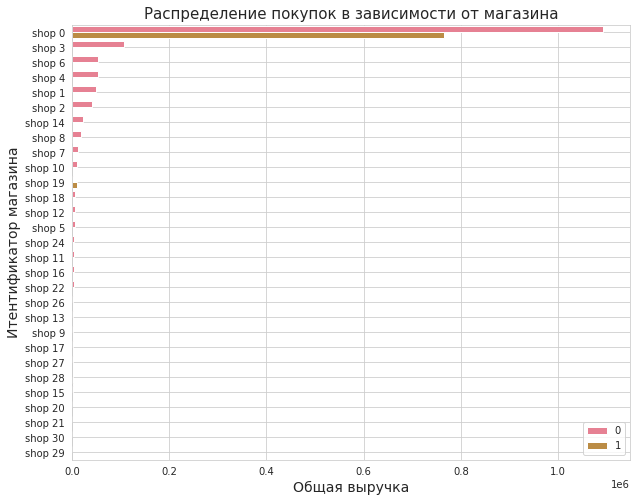

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.barplot(x="total_revenue", y="shop_id", hue="loyalty_program", data=total_revenue_per_shop, 
                 palette=sns.color_palette("husl", 8))
plt.legend(loc='lower right')
ax.set_title('Распределение покупок в зависимости от магазина', fontsize = 15)
ax.set_ylabel("Итентификатор магазина", fontsize = 14)
ax.set_xlabel("Общая выручка", fontsize = 14);
plt.grid(True);

Очень странно, но наши данные в основном охватывают только один магазин. Именно в нем сконцентрированы почти все участники программы лояльности. В остальных точках продаж намного меньше.

### Средний чек по магазинам

In [112]:
mean_check_per_shop = merged_df.groupby(['shop_id', 'loyalty_program', 'purchase_id'])['total_revenue']\
.sum().reset_index()\
.groupby(['shop_id', 'loyalty_program'])['total_revenue'].agg(['mean', 'median']).reset_index()\
.sort_values(by='median', ascending=False)

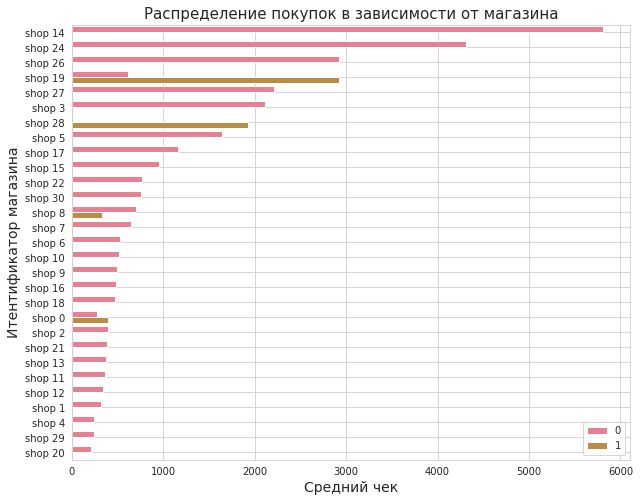

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.barplot(x="median", y="shop_id", hue="loyalty_program", data=mean_check_per_shop, 
                 palette=sns.color_palette("husl", 8))
plt.legend(loc='lower right')
ax.set_title('Распределение покупок в зависимости от магазина', fontsize = 15)
ax.set_ylabel("Итентификатор магазина", fontsize = 14)
ax.set_xlabel("Средний чек", fontsize = 14);
plt.grid(True);

Рейтинг магазинов в зависимости от величины среднего чека совсем изменился. Теперь наш магазин-лидер по выручке `Shop 0` находится в хвосте. Также оказывается, есть лояльные покупатели и в других магазинах, причем почти везде средний чек лояльного покупателя выше.

### Количество возвратов по магазинам

In [114]:
merged_df[merged_df['total_revenue'] < 0]\
.groupby(['shop_id', 'loyalty_program', 'customer_id'])\
.agg(refunds_count = ('purchase_id', 'nunique'))\
.reset_index()\
.groupby(['shop_id', 'loyalty_program'])\
.agg(refunds_count_median=('refunds_count', 'median'),
    refunds_count_mean=('refunds_count', 'mean'))\
.sort_values(by='refunds_count_median', ascending=False)

,,refunds_count_median,refunds_count_mean
shop_id,loyalty_program,,
shop 6,0,3.5,3.500000
shop 10,0,1.5,1.500000
shop 0,0,1.0,1.518033
shop 19,1,1.0,1.000000
shop 7,0,1.0,1.000000
shop 4,0,1.0,1.700000
shop 3,0,1.0,1.000000
shop 21,0,1.0,1.000000
shop 20,0,1.0,1.000000


В основном, число возвратов в магазинах одинаковое. Только в магазине `Shop 6` слишком большое число получилось, видимо, из-зи того, что данных по этому магазину очень мало и в них попало много возвратов.

### Количество покупок

In [115]:
purchases_count_per_shop = merged_df[merged_df['total_revenue'] > 0]\
.groupby(['shop_id', 'loyalty_program', 'customer_id'])\
.agg(purchases_count = ('purchase_id', 'nunique'))\
.reset_index()\
.groupby(['shop_id', 'loyalty_program'])\
.agg(purchases_count_median=('purchases_count', 'median'),
    purchases_count_mean=('purchases_count', 'mean'))\
.sort_values(by='purchases_count_median', ascending=False)


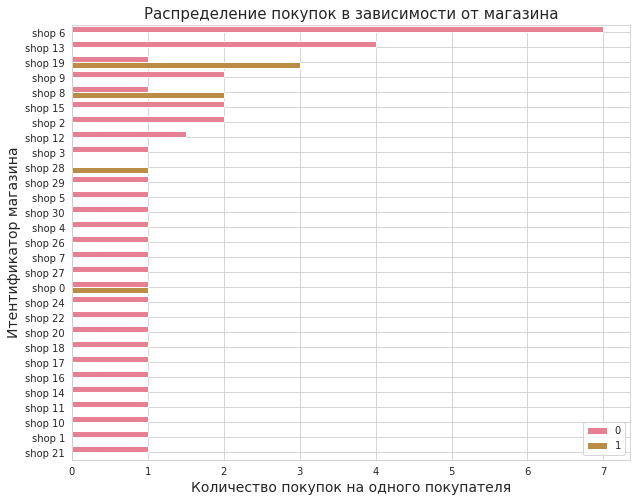

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.barplot(x="purchases_count_median", y="shop_id", hue="loyalty_program", 
                 data=purchases_count_per_shop.reset_index(), palette=sns.color_palette("husl", 8))
plt.legend(loc='lower right')
ax.set_title('Распределение покупок в зависимости от магазина', fontsize = 15)
ax.set_ylabel("Итентификатор магазина", fontsize = 14)
ax.set_xlabel("Количество покупок на одного покупателя", fontsize = 14);
plt.grid(True);

В магазине с достаточным количеством наблюдений `shop 0` число покупок в группах лояльности не отличается. А в магазинах с небольшим количеством наблюдений лояльные клиенты покупают чаще, а в магазин `shop 28` попали данные только от лояльных покупателей.

## Шаг 4. Проверка гипотез

### Гипотеза 1

Зададим критический уровень статистической значимости.

In [117]:
alpha = 0.05

Нулевая гипотеза H<sub>0</sub> звучит так: выручки в группах лояльных и нелояльных пользователей одинаковы.  
Альтернативная гипотеза H<sub>1</sub>: выручки в группах лояльных и нелояльных пользователей отличаются.  

In [118]:
group_0 = merged_df[merged_df['loyalty_program'] == 0]['total_revenue']
group_1 = merged_df[merged_df['loyalty_program'] == 1]['total_revenue']

In [119]:
results = st.ttest_ind(group_0, group_1)

In [120]:
results.pvalue

0.44594520840200613

In [121]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2

Нулевая гипотеза H<sub>0</sub> звучит так: средний чек в группах лояльных и нелояльных пользователей одинаков.  
Альтернативная гипотеза H<sub>1</sub>: средний чек в группах лояльных и нелояльных пользователей отличается.  

In [122]:
check_sum = merged_df.groupby(['loyalty_program', 'purchase_id'])['total_revenue'].sum().reset_index()
group_0 = check_sum[check_sum['loyalty_program'] == 0]['total_revenue']
group_1 = check_sum[check_sum['loyalty_program'] == 1]['total_revenue']

In [123]:
results = st.ttest_ind(group_0, group_1)

In [124]:
results.pvalue

0.6510619098413787

In [125]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


### Гипотеза 3

Нулевая гипотеза H<sub>0</sub> звучит так: число покупок на одного клиента в группах лояльных и нелояльных пользователей одинаково.  
Альтернативная гипотеза H<sub>1</sub>: число покупок на одного клиента в группах лояльных и нелояльных пользователей отличается.  

In [126]:
purchases_count_per_client = merged_df\
.groupby(['loyalty_program', 'customer_id', 'purchase_id'])['total_revenue'].sum().reset_index()\
.groupby(['loyalty_program', 'customer_id'])['purchase_id']\
.agg(purchases_count=('purchase_id', 'count')).reset_index()\

group_0 = purchases_count_per_client[purchases_count_per_client['loyalty_program'] == 0]['purchases_count']
group_1 = purchases_count_per_client[purchases_count_per_client['loyalty_program'] == 1]['purchases_count']

In [127]:
results = st.ttest_ind(group_0, group_1)

In [128]:
results.pvalue

0.46082530302647995

In [129]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


## Шаг 5. Вывод и рекомендации

Мы проанализировали выручку, сумму чека, средний чек, количество покупок, количество возвратов в разрезе покупателей, групп лояльности, магазинов.  
Также мы выдвинули и проверили ряд гипотез.  
Несмотря на то, что средний чек на одного лояльного покупателя выше, мы не нашли статистически значимых отличий ни по сумме выручки, ни по среднему чеку, ни по количеству покупок в группах лояльных и нелояльных покупателей.  

Исходя из выше перечисленного, можем сделать вывод, что программа лояльности не
приносит сверхприбыли. Статистически значимых отличий в метриках групп не найдено. Нет
смысла продолжать вкладывать средства в развитие программы лояльности.